In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv
/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv


In [2]:
train_df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_training.csv")
valid_df = pd.read_csv("/kaggle/input/twitter-entity-sentiment-analysis/twitter_validation.csv")

In [3]:
train_df.head(10)

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
5,2402,Borderlands,Positive,So I spent a few hours making something for fu...
6,2402,Borderlands,Positive,So I spent a couple of hours doing something f...
7,2402,Borderlands,Positive,So I spent a few hours doing something for fun...
8,2402,Borderlands,Positive,So I spent a few hours making something for fu...
9,2402,Borderlands,Positive,2010 So I spent a few hours making something f...


In [4]:
train_df.columns = ["Header","Company",'labels','text']
valid_df.columns = ["Header","Company",'labels','text']

In [5]:
train_df.sample(3)

,Header,Company,labels,text
6876,384,Amazon,Neutral,@ YES43211643 Thank you for participating in S...
50730,6308,FIFA,Irrelevant,Good morning guys! I woke up and now feel 100 ...
22731,4295,CS-GO,Neutral,. Free access to you your dream CS : i GO skin...


In [6]:
valid_df.sample(3)

,Header,Company,labels,text
750,1752,CallOfDutyBlackopsColdWar,Neutral,Excited for #BlackOpsColdWar? \nUp your gamepl...
790,12912,Xbox(Xseries),Irrelevant,Stop acting like your not educated stop with t...
642,9683,PlayStation5(PS5),Neutral,"While the store now is mess, with PS5 and rede..."


In [7]:
train_df.drop(columns=["Header","Company"],inplace=True)
valid_df.drop(columns=["Header","Company"],inplace=True)

In [8]:
valid_df.sample(3)

,labels,text
968,Neutral,Red Dead Redemption pic.twitter.com/qNN6Cnz5YQ
157,Neutral,"first game of the day,, eventhough my damage i..."
651,Irrelevant,I can't believe that @realDonaldTrump lied.


In [9]:
all_data = pd.concat([train_df,valid_df],ignore_index=True)
all_data

,labels,text
0,Positive,I am coming to the borders and I will kill you...
1,Positive,im getting on borderlands and i will kill you ...
2,Positive,im coming on borderlands and i will murder you...
3,Positive,im getting on borderlands 2 and i will murder ...
4,Positive,im getting into borderlands and i can murder y...
...,...,...
75675,Irrelevant,⭐️ Toronto is the arts and culture capital of ...
75676,Irrelevant,tHIS IS ACTUALLY A GOOD MOVE TOT BRING MORE VI...
75677,Positive,Today sucked so it’s time to drink wine n play...
75678,Positive,Bought a fraction of Microsoft today. Small wins.


In [10]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75680 entries, 0 to 75679
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   labels  75680 non-null  object
 1   text    74994 non-null  object
dtypes: object(2)
memory usage: 1.2+ MB


In [11]:
all_data.isnull().sum()

labels      0
text      686
dtype: int64

In [12]:
all_data.dropna(inplace=True)
all_data.isnull().sum()

labels    0
text      0
dtype: int64

In [13]:
all_data.duplicated().sum()

4743

In [14]:
all_data.drop_duplicates(inplace=True)
all_data.duplicated().sum()

0

In [15]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import numpy as np

In [16]:
nltk.download('wordnet', "/kaggle/working/nltk_data/", quiet=True)
nltk.download('omw-1.4', "/kaggle/working/nltk_data/", quiet=True)

!unzip -q /kaggle/working/nltk_data/corpora/wordnet.zip -d /kaggle/working/nltk_data/corpora
!unzip -q /kaggle/working/nltk_data/corpora/omw-1.4.zip -d /kaggle/working/nltk_data/corpora

nltk.data.path.append("/kaggle/working/nltk_data/")

In [17]:
def clean_text(text):
    if isinstance(text, str):

        text = re.sub(r'\s+', ' ', text, flags=re.I) # Remove extra white space from text

        # Remove special characters
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\W', ' ', str(text)) 

        # Remove all single characters from text
        text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)

        # Remove numbers
        text = re.sub(r'\d+', '', text)

                

        # Remove stop words
        text = text.lower()
    
        words = word_tokenize(text)
    
        lemmatizer = WordNetLemmatizer()
        words = [lemmatizer.lemmatize(word) for word in words]
    
        stop_words = set(stopwords.words("english"))
        Words = [word for word in words if word not in stop_words]
    
        Words = [word for word in Words if len(word) > 3]
    
        indices = np.unique(Words, return_index=True)[1]
        cleaned_text = np.array(Words)[np.sort(indices)].tolist()
        return cleaned_text
    else:
        return text
  

In [18]:
x = all_data.drop('labels',axis=1)
y = all_data.labels

In [19]:
x

,text
0,I am coming to the borders and I will kill you...
1,im getting on borderlands and i will kill you ...
2,im coming on borderlands and i will murder you...
3,im getting on borderlands 2 and i will murder ...
4,im getting into borderlands and i can murder y...
...,...
75668,♥️ Suikoden 2\n1️⃣ Alex Kidd in Miracle World\...
75669,Thank you to Matching funds Home Depot RW paym...
75671,Late night stream with the boys! Come watch so...
75675,⭐️ Toronto is the arts and culture capital of ...


In [20]:
y

0          Positive
1          Positive
2          Positive
3          Positive
4          Positive
            ...    
75668       Neutral
75669      Positive
75671       Neutral
75675    Irrelevant
75676    Irrelevant
Name: labels, Length: 70251, dtype: object

In [21]:
texts = list(x['text'])

In [22]:
cleaned_text  = x["text"].apply(clean_text)

In [23]:
print(cleaned_text[:10])

0                               [coming, border, kill]
1                          [getting, borderland, kill]
2                         [coming, borderland, murder]
3                        [getting, borderland, murder]
4                        [getting, borderland, murder]
5    [spent, hour, making, something, dont, know, h...
6    [spent, couple, hour, something, dont, know, h...
7    [spent, hour, something, dont, know, huge, bor...
8    [spent, hour, making, something, dont, know, h...
9    [spent, hour, making, something, dont, know, h...
Name: text, dtype: object


In [24]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(cleaned_text, y, test_size=0.2, random_state=42)

In [25]:
print(len(max(cleaned_text, key=len)))

38


In [26]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_vocab = 20000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(xtrain)
word_idx = tokenizer.word_index 

v = len(word_idx)
print("the size of vocab = ", v)

2025-08-11 15:30:52.584722: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1754926252.761443      36 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1754926252.830549      36 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


the size of vocab =  31791


In [27]:
xtrain = tokenizer.texts_to_sequences(xtrain)
xtest = tokenizer.texts_to_sequences(xtest)

In [28]:
max_len = 100
xtrain = pad_sequences(xtrain, maxlen = max_len)
xtest = pad_sequences(xtest, maxlen = max_len)

In [29]:
y.value_counts()

labels
Negative      21329
Positive      19270
Neutral       17281
Irrelevant    12371
Name: count, dtype: int64

In [30]:
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam
from keras import optimizers


model = Sequential([
    Embedding(v+1, 100, input_length=max_len),
    Dropout(0.5),
    Bidirectional(LSTM(150)),
    Dense(32, activation='relu'),
    Dense(4, activation="softmax")
    
])


model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy',
             metrics=["accuracy"])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
I0000 00:00:1754926265.367066      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1754926265.368011      36 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


In [31]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(ytrain)
y_test_encoded = label_encoder.transform(ytest)

In [32]:
import tensorflow as tf

y_train_one_hot = tf.keras.utils.to_categorical(y_train_encoded)
y_test_one_hot = tf.keras.utils.to_categorical(y_test_encoded)

In [33]:
hist = model.fit(xtrain, y_train_one_hot, epochs=20,
                validation_data=(xtest, y_test_one_hot))

Epoch 1/20


I0000 00:00:1754926271.939206     102 cuda_dnn.cc:529] Loaded cuDNN version 90300


1757/1757 ━━━━━━━━━━━━━━━━━━━━ 31s 14ms/step - accuracy: 0.3624 - loss: 1.3201 - val_accuracy: 0.5776 - val_loss: 1.0318
Epoch 2/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.6091 - loss: 0.9625 - val_accuracy: 0.6708 - val_loss: 0.8338
Epoch 3/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.7130 - loss: 0.7410 - val_accuracy: 0.7145 - val_loss: 0.7251
Epoch 4/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.7702 - loss: 0.6107 - val_accuracy: 0.7585 - val_loss: 0.6348
Epoch 5/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8024 - loss: 0.5245 - val_accuracy: 0.7777 - val_loss: 0.5855
Epoch 6/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8269 - loss: 0.4659 - val_accuracy: 0.7957 - val_loss: 0.5446
Epoch 7/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.8413 - loss: 0.4184 - val_accuracy: 0.7957 - val_loss: 0.5582
Epoch 8/20
1757/1757 ━━━━━━━━━━━━━━━━━━━━ 25s 14ms/step - accuracy: 0.8533 - loss: 0.38

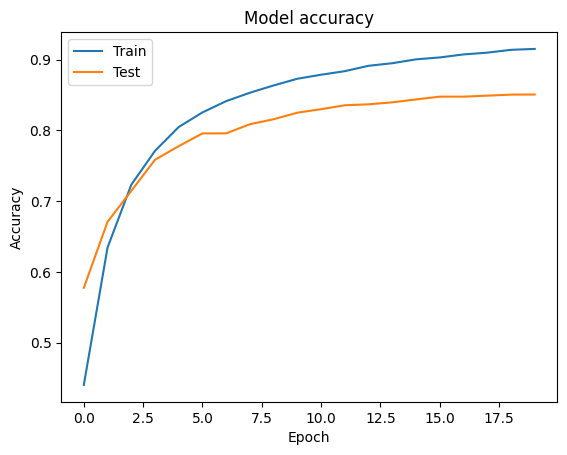

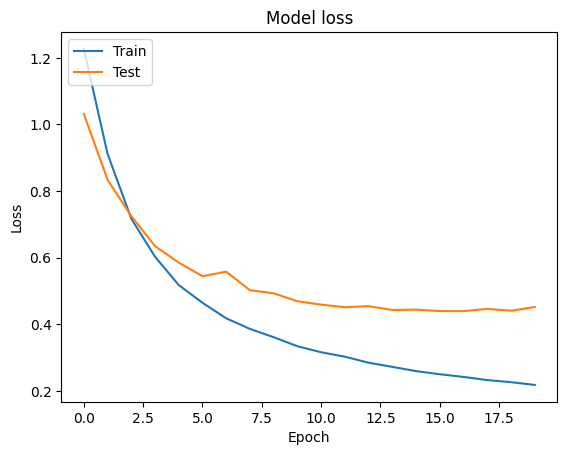

In [35]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [37]:
# Evaluate the model on the test data
loss, accuracy = model.evaluate(xtest, y_test_one_hot)

print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

440/440 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8482 - loss: 0.4554
Test Loss: 0.45202410221099854
Test Accuracy: 0.8505444526672363


440/440 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step


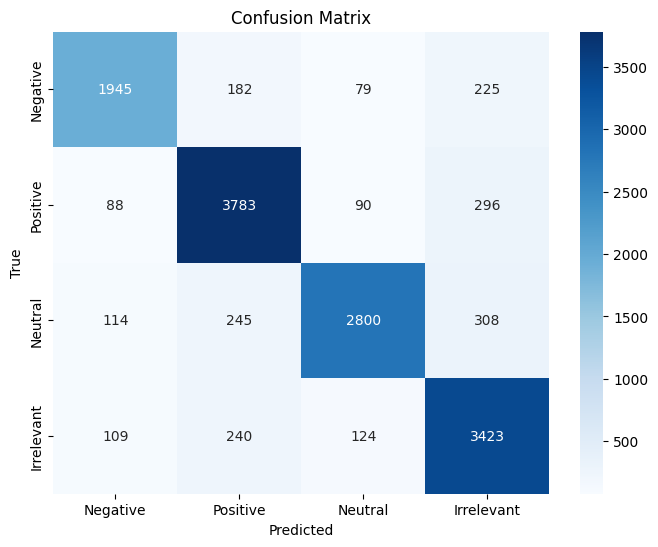

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np


y_pred_probs = model.predict(xtest)
y_pred_labels = np.argmax(y_pred_probs, axis=1)
y_true_labels = np.argmax(y_test_one_hot, axis=1)
conf_matrix = confusion_matrix(y_true_labels, y_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive', 'Neutral', "Irrelevant"], 
            yticklabels=['Negative', 'Positive', 'Neutral', "Irrelevant"])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [40]:
model.save('Sentiment_Analysis_85_test_Acc.keras')